# Spam/Ham Detector System

Ham - Opposite of Spam

In [4]:
#Importing the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
#Loading the data

data = pd.read_table("SMSSpamCollection.txt", 
                     sep = "\t",
                    header = None,
                    names = ["label", "messages"])

In [8]:
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### EXPLORING THE DATA

In [9]:
data.shape

(5572, 2)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
data.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
data.isnull().sum().sum()

0

### EXPLORATORY DATA ANALYSIS

Total Number of Ham Cases -  4825
Toal Number of Spam Cases -  747


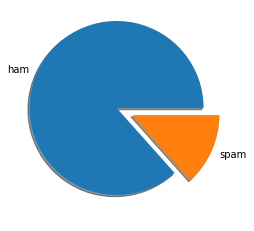

In [13]:
# Seeing the distribution of classes
# Will help us to identify which types

len_ham = len(data["label"][data.label == "ham"])
len_spam = len(data["label"][data.label == "spam"])

arr = np.array([len_ham, len_spam])
labels = ['ham', 'spam']

print("Total Number of Ham Cases - ", len_ham)
print("Toal Number of Spam Cases - ", len_spam)

plt.pie(arr, labels = labels, explode = [0.2, 0.0], shadow = True)
plt.show()

As we can see from the above plot, the data is imbalanced <br>
Which means that the model will learn more about ham than spam

### Text PreProcessing

In [19]:
def text_preprocess(x):
    x = str(x).lower() #converting all text to lowercase
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will") 
    return x  

data["Preprocessed Text"] = data["messages"].apply(lambda x : text_preprocess(x)) #making a new column

# Using NLTK - Stemming & Lemmitization
# Mostly used in text data

In [20]:
data.head()

,label,messages,Preprocessed Text
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar..."


### Feature Engineering

In [21]:
data["label"] = data.label.map({'ham' : 0, 'spam' : 1})

### Data Development

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Preprocessed Text'], 
                                                    data['label'], 
                                                    random_state = 1)

print('Number of Rows in the Total set - {}'.format(data.shape[0]), '\n') 
print('Number of Rows in the Training set - {}'.format(X_train.shape[0]))
print('Number of Rows in the Test set - {}'.format(X_test.shape[0]))

Number of Rows in the Total set - 5572 

Number of Rows in the Training set - 4179
Number of Rows in the Test set - 1393


In [25]:
X_train

710     4mths half price orange line rental & latest c...
3740                           did you stitch his trouser
2711    hope you enjoyed your new content. text stop t...
3155    not heard from u4 a while. call 4 rude chat pr...
3748    ü neva tell me how i noe... i am not at home i...
                              ...                        
905     we are all getting worried over here, derek an...
5192    oh oh... den muz change plan liao... go back h...
3980    ceri u rebel! sweet dreamz me little buddy!! c...
235     text & meet someone sexy today. u can find a d...
5157                              k k:) sms chat with me.
Name: Preprocessed Text, Length: 4179, dtype: object

Since our data is in the form of text, we cannot simply apply this data into a model <br>
Thus, we have to convert these words into some text <br>
There are a few modules like CountVectorizer, TFIDF Vectorizer, Bag of Words, etc, to perform the above <br>

In [48]:
from sklearn.feature_extraction.text import CountVectorizer 

#Instantiating the CountVectorizer method
count_vector = CountVectorizer() 

#Fitting the data & returning matrix
training_data = count_vector.fit_transform(X_train) 

# Transforming testing data & returning matrix.
testing_data = count_vector.transform(X_test)

### MODEL DEVELOPMENT

In [43]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train) 

MultinomialNB()

In [44]:
predictions = naive_bayes.predict(testing_data) 
predictions

array([0, 0, 0, ..., 0, 1, 0])

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score - ', format(accuracy_score(y_test, predictions))) 
print('Precision score - ', format(precision_score(y_test, predictions))) 
print('Recall score - ', format(recall_score(y_test, predictions))) 
print('F1 score - ', format(f1_score(y_test, predictions))) 

Accuracy score -  0.9877961234745154
Precision score -  0.9719101123595506
Recall score -  0.9351351351351351
F1 score -  0.953168044077135


### FOR TESTING

In [51]:
txt = pd.Series("This is the 2nd time we have tried 2 contact u...")
test = count_vector.transform(txt)  

In [52]:
naive_bayes.predict(test)

array([0])